In this project, you have to predict whether a patient has a low chance of a heart attack or a high chance according to the medical information of a patient, which is fully described below?! The data is saved in heart.csv file.

- Age
- Sex
- Does the pain start with a specific activity? (expansion)
    - Number one means yes
    - Zero means no
- Number of main vessels (ca)
    - A value from zero to three
- type of chest pain (cp)
    - Value 1: direct heart pain
    - Value 2: Indirect pain that leads to feeling pain in the heart
    - Value 3: non-cardiac pain
    - Value 4: No symptoms
- resting blood pressure (trtbps)
- blood fat (chol)
- High fasting blood sugar - diabetes (fbs)
    - It has a value of one
    - Zero value: none
- The result of the resting ECG (rest_ecg)
    - Zero value: normal
    - Value one: the ST segment of the ECG is abnormal
    - Value two: Probably or definitely the left ventricle is large
- maximum heart rate (thalach)
- chance of heart attack (target)
    - Zero value: low chance
    - Value one: high chance  

In [2]:
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

C:\Users\Amir\AppData\Local\Temp\ipykernel_1188\10917061.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df = pd.read_csv('heart.csv')
df.head(5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [5]:
df.shape

(303, 14)

In [6]:
x = np.asanyarray(df[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']])
x[0:5]

array([[ 63. ,   1. ,   3. , 145. , 233. ,   1. ,   0. , 150. ,   0. ,
          2.3,   0. ,   0. ,   1. ],
       [ 37. ,   1. ,   2. , 130. , 250. ,   0. ,   1. , 187. ,   0. ,
          3.5,   0. ,   0. ,   2. ],
       [ 41. ,   0. ,   1. , 130. , 204. ,   0. ,   0. , 172. ,   0. ,
          1.4,   2. ,   0. ,   2. ],
       [ 56. ,   1. ,   1. , 120. , 236. ,   0. ,   1. , 178. ,   0. ,
          0.8,   2. ,   0. ,   2. ],
       [ 57. ,   0. ,   0. , 120. , 354. ,   0. ,   1. , 163. ,   1. ,
          0.6,   2. ,   0. ,   2. ]])

In [7]:
y = np.asanyarray(df[['output']])
y[0:5]

array([[1],
       [1],
       [1],
       [1],
       [1]], dtype=int64)

In [8]:
# normalize the dataframe
scaler = preprocessing.StandardScaler().fit(x)
x = scaler.transform(x.astype(float))
x[0:5]


array([[ 0.9521966 ,  0.68100522,  1.97312292,  0.76395577, -0.25633371,
         2.394438  , -1.00583187,  0.01544279, -0.69663055,  1.08733806,
        -2.27457861, -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, -0.09273778,  0.07219949,
        -0.41763453,  0.89896224,  1.63347147, -0.69663055,  2.12257273,
        -2.27457861, -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, -0.09273778, -0.81677269,
        -0.41763453, -1.00583187,  0.97751389, -0.69663055,  0.31091206,
         0.97635214, -0.71442887, -0.51292188],
       [ 0.18017482,  0.68100522,  0.03203122, -0.66386682, -0.19835726,
        -0.41763453,  0.89896224,  1.23989692, -0.69663055, -0.20670527,
         0.97635214, -0.71442887, -0.51292188],
       [ 0.29046364, -1.46841752, -0.93851463, -0.66386682,  2.08204965,
        -0.41763453,  0.89896224,  0.58393935,  1.43548113, -0.37924438,
         0.97635214, -0.71442887, -0.51292188]])

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

print(f'Train set size: {x_train.shape} {y_train.shape}')
print(f'Test set size: {x_test.shape} {y_test.shape}')

Train set size: (242, 13) (242, 1)
Test set size: (61, 13) (61, 1)


KNN

0.8524590163934426


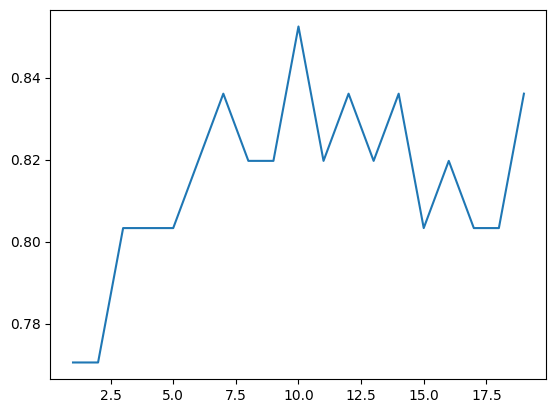

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

max_k = 20
mean_acc = np.zeros((max_k-1))
std_acc = np.zeros((max_k-1))

for k in range(1,max_k):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train.ravel())
    yhat = knn.predict(x_test)
    mean_acc[k-1] = accuracy_score(y_test, yhat)

acc = pd.DataFrame (mean_acc, columns =['accuracy'])

plt.plot(np.arange(1,20),mean_acc)
print(max(mean_acc))


In [68]:
print( "The best accuracy was", round(mean_acc.max(),2), "with k =", mean_acc.argmax()+1) 

The best accuracy was 0.85 with k = 10


Decision Tree

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

criterionArray = ['gini', 'entropy', 'log_loss']

acc_sco = np.zeros(3)
i = 0
for c in criterionArray :
    dt = DecisionTreeClassifier(criterion=c)
    dt.fit(x_train, y_train)
    yhat = dt.predict(x_test)
    acc_sco[i] = accuracy_score(y_test, yhat)
    i += 1

acc = pd.DataFrame({'Criterion': criterionArray, 'Accuracy Score': acc_sco})
acc

,Criterion,Accuracy Score
0,gini,0.819672
1,entropy,0.819672
2,log_loss,0.819672


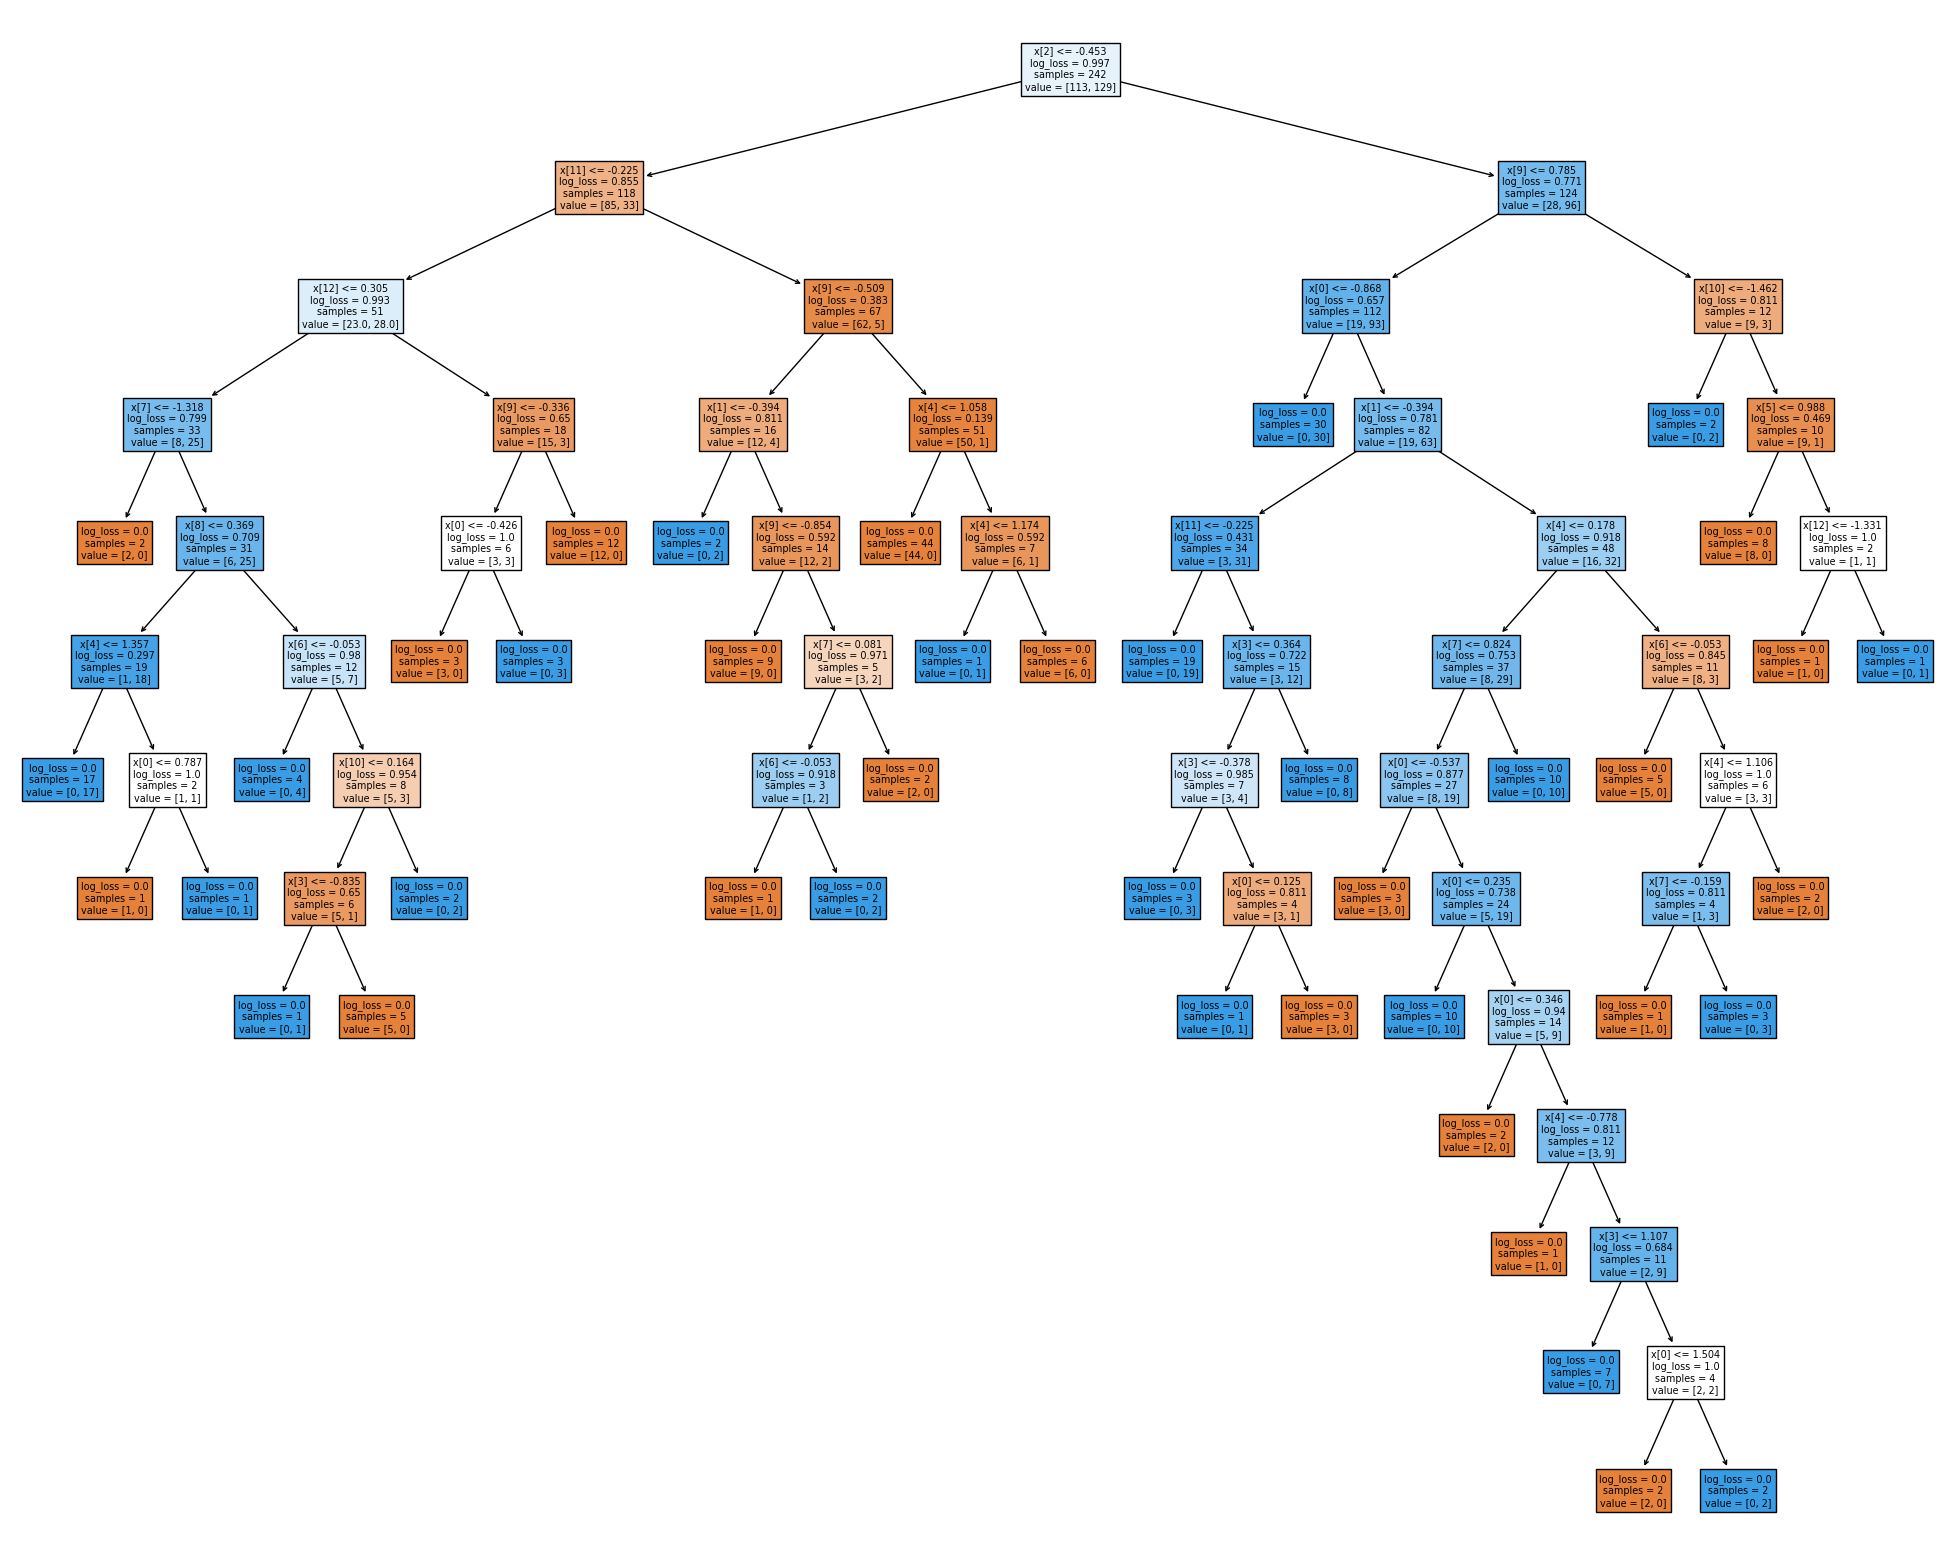

In [13]:
fig = plt.figure(figsize=(25,20))
plot_tree_ = plot_tree(dt, filled=True)

Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import jaccard_score

solverArray = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']

jacc_sco = np.zeros(6)
i = 0

for sa in solverArray:
    lr = LogisticRegression(C=0.01,solver=sa)
    lr.fit(x_train,y_train)
    yhat = lr.predict(x_test)
    jacc_sco[i] = jaccard_score(y_test, yhat, pos_label=1)
    i += 1

jacc = pd.DataFrame({'Solvers': solverArray, 'Jaccard Score': jacc_sco})
print(jacc)



           Solvers  Jaccard Score
0            lbfgs       0.853659
1        liblinear       0.825000
2        newton-cg       0.853659
3  newton-cholesky       0.853659
4              sag       0.853659
5             saga       0.853659


d:\ml-development\test\.env\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\ml-development\test\.env\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\ml-development\test\.env\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\ml-development\test\.env\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

In [65]:
print( "The best jaccard score was", round(mean_acc.max(),2), "percent with k =", mean_acc.argmax()+1) 

The best jaccard score was 0.85 percent with k = 10


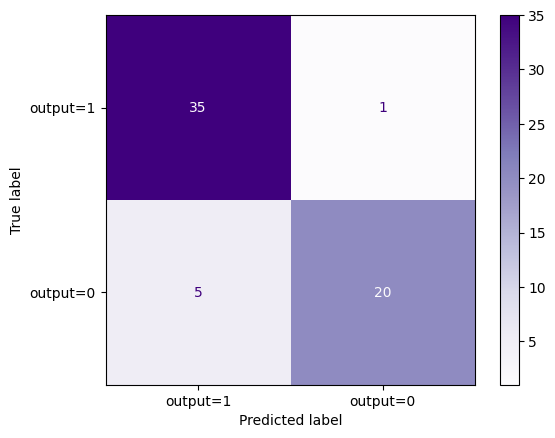

In [53]:
# confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, yhat, labels=[1,0])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['output=1','output=0'])
disp.plot(cmap='Purples')

plt.show()

SVM


              precision    recall  f1-score   support

           0       0.85      0.92      0.88        25
           1       0.94      0.89      0.91        36

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



d:\ml-development\test\.env\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


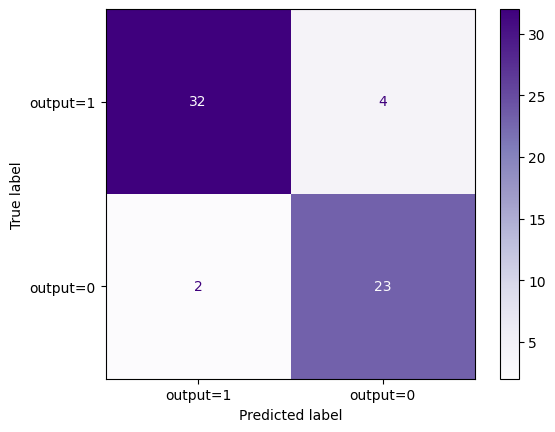

In [57]:
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix

clf = svm.SVC(kernel='linear')
clf.fit(x_train, y_train)
yhat = clf.predict(x_test)
print (classification_report(y_test, yhat))

cm = confusion_matrix(y_test, yhat, labels=[1,0])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['output=1','output=0'])
disp.plot(cmap='Purples')

In [71]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score

print('jaccard score is', round(jaccard_score(y_test, yhat,pos_label=1), 3))
print('f1 score is', round(f1_score(y_test, yhat, average='weighted'), 3))

jaccard score is 0.842
f1 score is 0.902


<center>Amirhossein Hashemi - 2024 </center>